<a href="https://colab.research.google.com/github/srigouri/CE888/blob/master/Research_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries:

In [59]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.utils import plot_model
import tensorflow
import tensorflow.keras as tk
mnist = tk.datasets.mnist

#Loading Data:

In [61]:
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test)= keras.datasets.fashion_mnist.load_data()

In [62]:
X_fashion_train.shape , y_fashion_train.shape

((60000, 28, 28), (60000,))

In [63]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

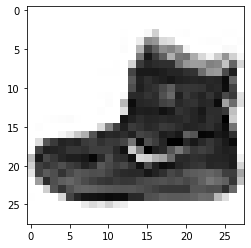

In [64]:
plt.imshow(X_fashion_train[0],cmap = 'Greys')

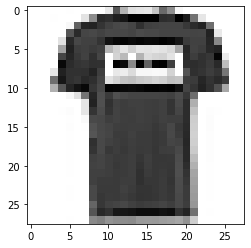

In [65]:
plt.imshow(X_fashion_train[1],cmap = 'Greys')

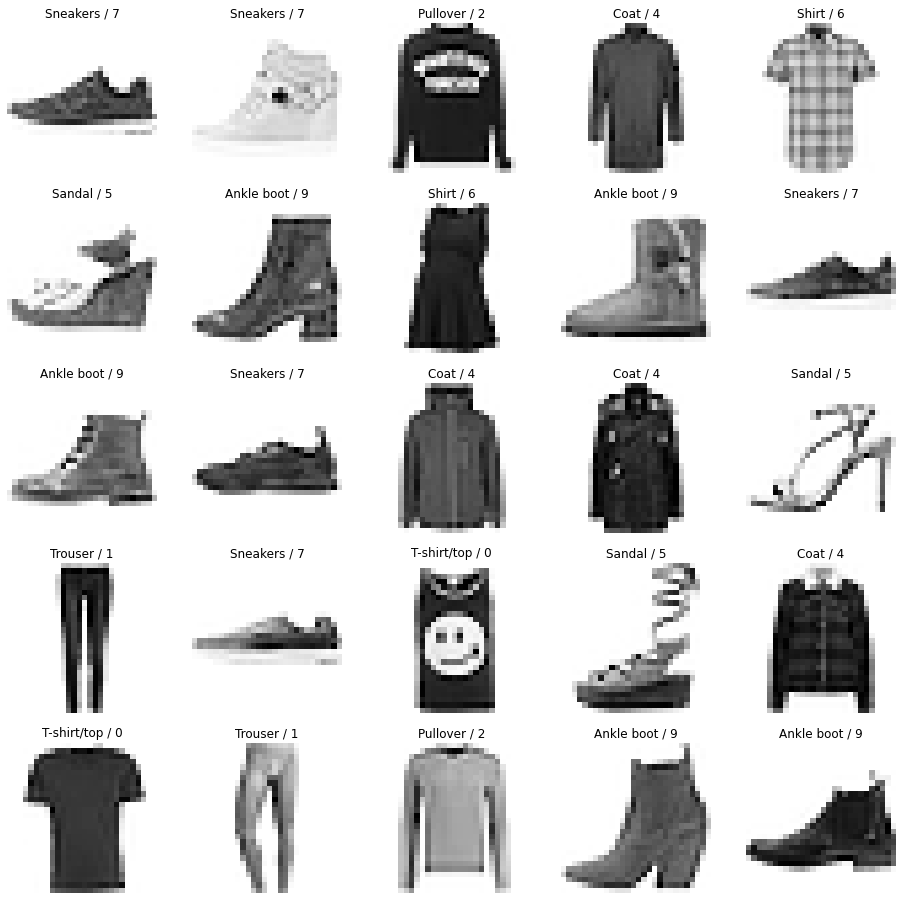

In [66]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_fashion_train[i],cmap = 'Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_fashion_train[i]],y_fashion_train[i]))

[9 0 3 2 7 5 1 6 4 8]
[0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


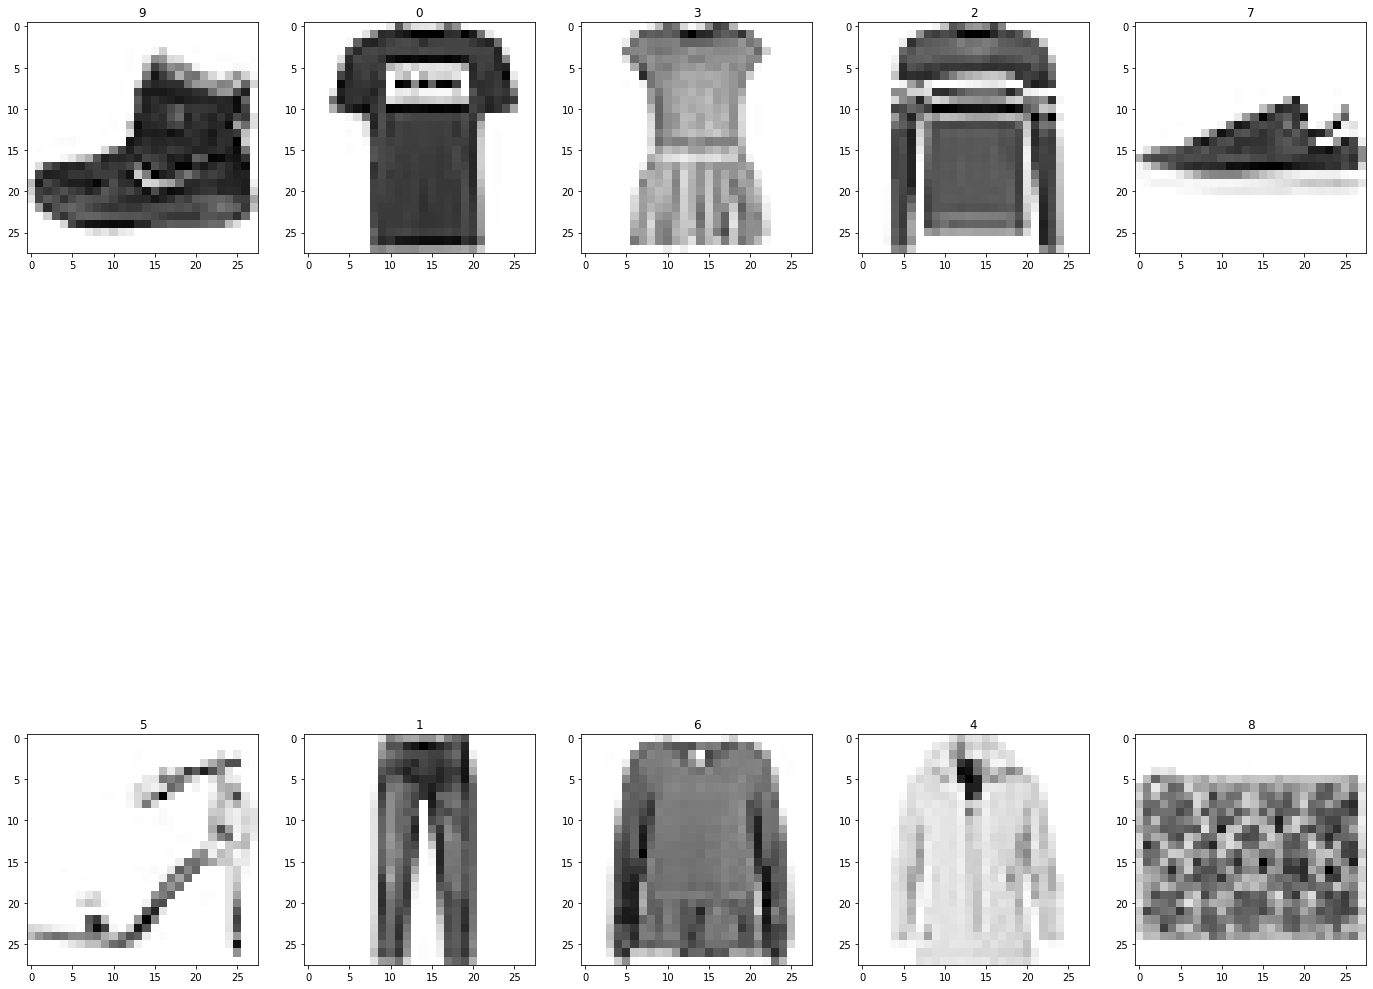

In [67]:
fashionMNIST = keras.datasets.fashion_mnist
(x_fashion_train,y_fashion_train),(x_fashion_test,y_fashion_test) = fashionMNIST.load_data()
x_fashion_train = np.expand_dims(x_fashion_train,-1) 
x_fashion_test = np.expand_dims(x_fashion_test,-1) 
ei1 = np.array(pd.unique(y_fashion_train))
eindex1 = []
print(ei1)
for i in ei1:
    eindex1.append(list(y_fashion_train).index(i))
print(eindex1)


plt.figure(figsize=(24,24))
for x,y in enumerate(eindex1):
  print(x_fashion_train[y].shape)
  plt.subplot(2,5,x+1)
  plt.imshow(tensorflow.squeeze(x_fashion_train[y]),cmap="Greys")
  plt.title('{}'.format(ei1[x]))

In [68]:
X_fashion_train.ndim 

3

In [69]:
X_fashion_train.shape

(60000, 28, 28)

In [70]:
X_fashion_train  = np.expand_dims(X_fashion_train,-1)
X_fashion_test  = np.expand_dims(X_fashion_test,-1)

# Feature Scaling

In [71]:
X_fashion_train = X_fashion_train/255
X_fashion_test = X_fashion_test/255

In [72]:
X_fashion_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

#Splitting for Validation

In [73]:
from sklearn.model_selection import train_test_split
X_fashion_train, X_fashion_val , y_fashion_train , y_fashion_val = train_test_split(X_fashion_train,y_fashion_train , test_size = 0.2 , random_state = 2020)

In [74]:
X_fashion_train.shape, y_fashion_train.shape

((48000, 28, 28, 1), (48000,))

In [75]:
X_fashion_val.shape, y_fashion_val.shape

((12000, 28, 28, 1), (12000,))

In [76]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

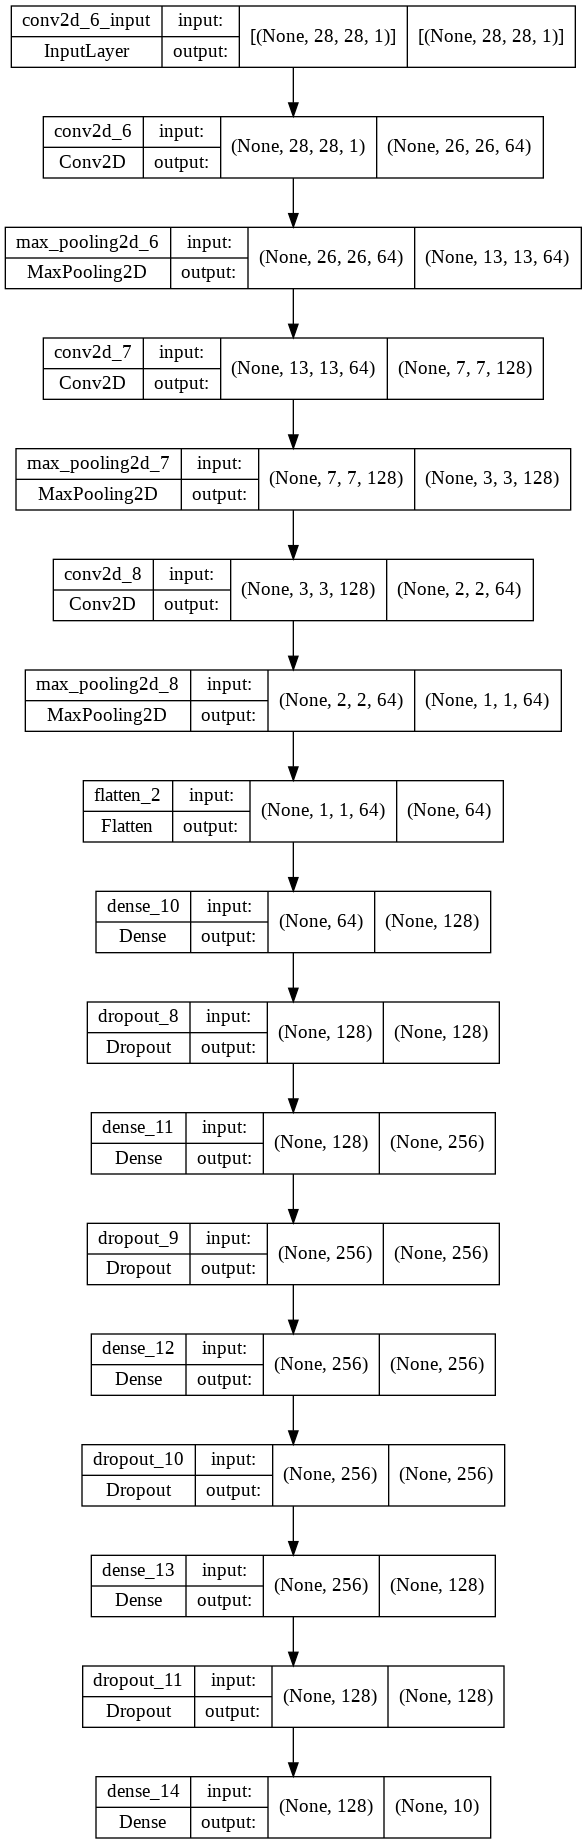

In [77]:
keras.utils.vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

# Model Fitting:

In [79]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [80]:
model.fit(X_fashion_train,y_fashion_train,epochs = 20,batch_size = 512,verbose = 1, validation_data=(X_fashion_val,y_fashion_val))

Epoch 1/20
94/94 [==============================] - 56s 587ms/step - loss: 1.2217 - accuracy: 0.5192 - val_loss: 0.6146 - val_accuracy: 0.7598
Epoch 2/20
94/94 [==============================] - 54s 575ms/step - loss: 0.5922 - accuracy: 0.7748 - val_loss: 0.5227 - val_accuracy: 0.8007
Epoch 3/20
94/94 [==============================] - 54s 572ms/step - loss: 0.4913 - accuracy: 0.8167 - val_loss: 0.4245 - val_accuracy: 0.8452
Epoch 4/20
94/94 [==============================] - 53s 565ms/step - loss: 0.4196 - accuracy: 0.8482 - val_loss: 0.3787 - val_accuracy: 0.8575
Epoch 5/20
94/94 [==============================] - 53s 565ms/step - loss: 0.3705 - accuracy: 0.8683 - val_loss: 0.3378 - val_accuracy: 0.8769
Epoch 6/20
94/94 [==============================] - 53s 560ms/step - loss: 0.3378 - accuracy: 0.8802 - val_loss: 0.3349 - val_accuracy: 0.8792
Epoch 7/20
94/94 [==============================] - 53s 563ms/step - loss: 0.3130 - accuracy: 0.8900 - val_loss: 0.3092 - val_accuracy: 0.8879

#Testing the Model:

In [81]:
# np.expand is used to change the 3 dimension data into 4 dimension
model.predict(np.expand_dims(X_fashion_test[0],axis = 0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [82]:
np.argmax(model.predict(np.expand_dims(X_fashion_test[0],axis = 0)).round(2))

9

In [83]:
# cross check 
y_fashion_test[0]

9

In [84]:
y_pred = model.predict(X_fashion_test).round(2)
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#Evaluation:

In [85]:
model.evaluate(X_fashion_test,y_fashion_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3206 - accuracy: 0.9016


[0.32059144973754883, 0.9016000032424927]

Accuracy given by Train set is 0.94 and Accuracy given by Test set is 0.90, Thus we can we say that our model is generalized so no overfitting nor underfitting.

#Confusion Matrix

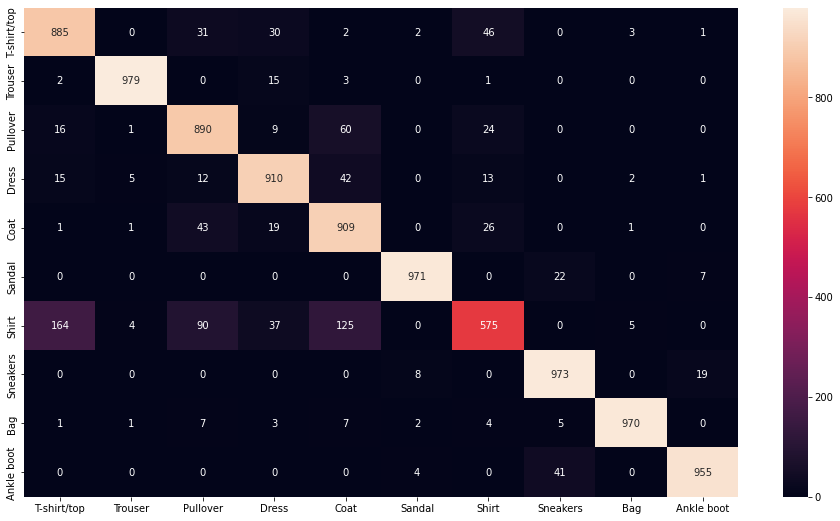

In [86]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_fashion_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)

# Visualisation of Output:

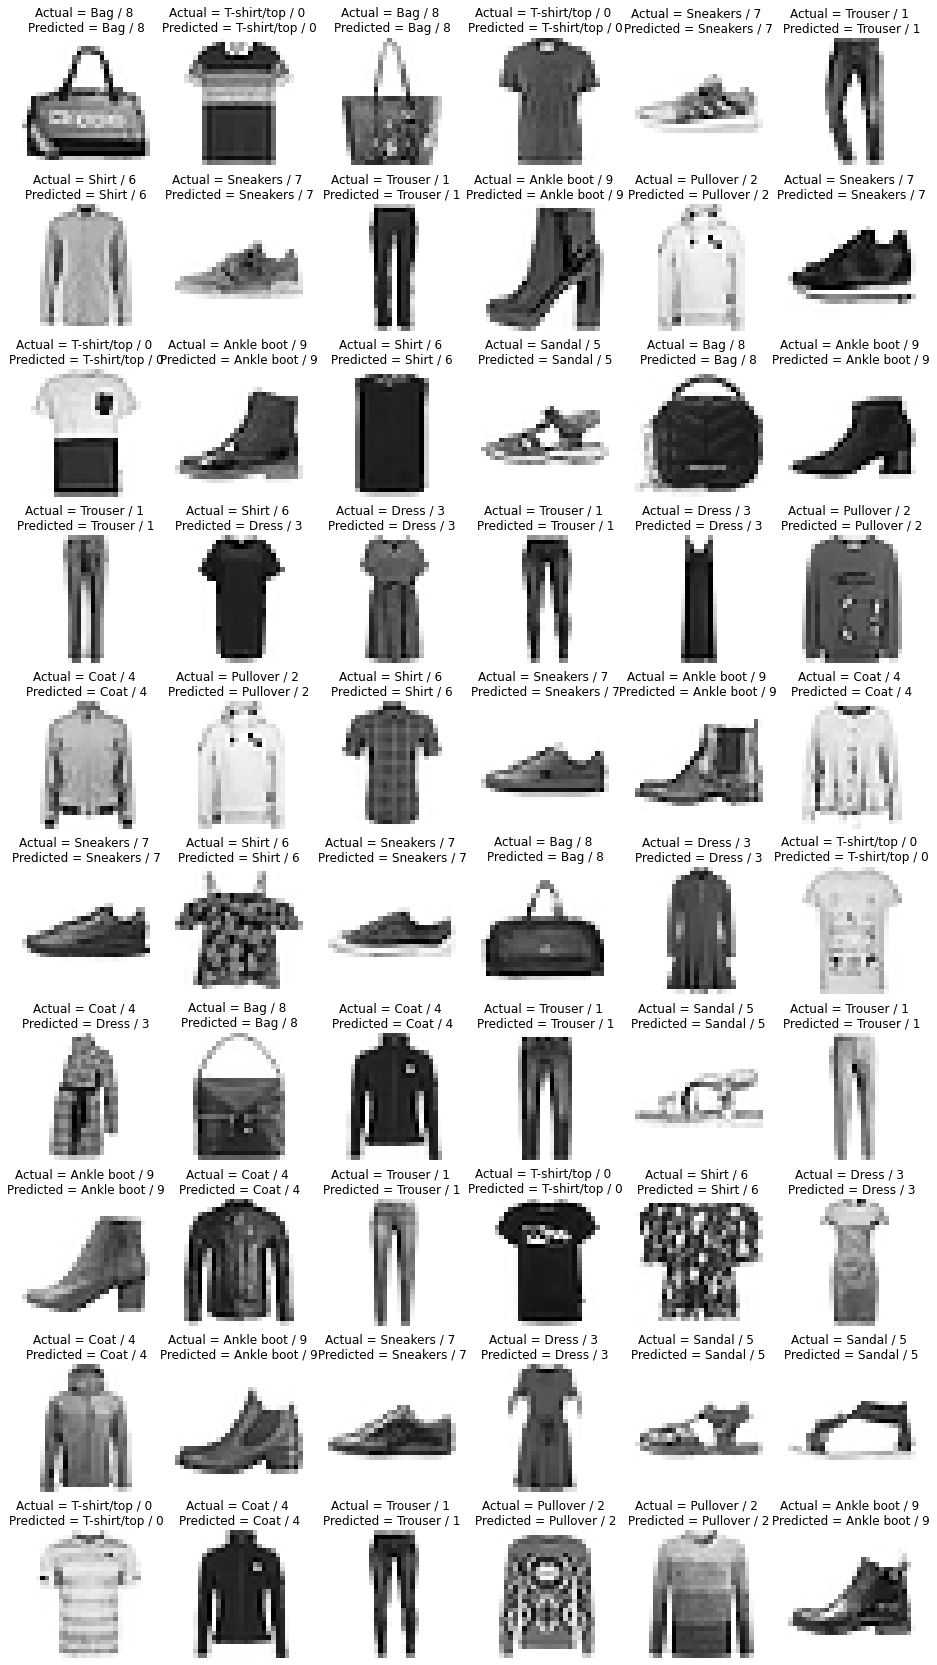

In [87]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_fashion_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_fashion_test[i]],y_fashion_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

In [88]:
from sklearn.metrics import classification_report
cr = classification_report (y_fashion_test,y_pred_labels,target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.89      0.86      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.79      0.91      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.83      0.57      0.68      1000
    Sneakers       0.93      0.97      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

